In [1]:
#Problem Statement
#Analysing the accidents in Barcelona

#Importing Numpy and Pandas
import numpy as np
import pandas as pd
#Reading Data
barcelona=pd.read_csv("C:\\Users\\Teju\\Desktop\\barcelona\\BarcelonaDataset-master\\accidents_2017.csv")
barcelona.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [2]:
#Data Visualization
#Distric Name has unknown values 
#We are finding district names by using Latitudes and Longitudes Data

#Imputing District Name Data using Latitiude and Longitude Information
#reverse_geocoder is a function to get district name using Latitudes and Longitudes

import reverse_geocoder as rg
import pprint

def reverseGeocode(coordinates):
    result = rg.search(coordinates)
    return result
coordinates =(2.125, 41.340)
a=reverseGeocode(coordinates)
a

Loading formatted geocoded file...


[OrderedDict([('lat', '2.34464'),
              ('lon', '42.27644'),
              ('name', 'Baardheere'),
              ('admin1', 'Gedo'),
              ('admin2', ''),
              ('cc', 'SO')])]

In [3]:
a[0]['name']

'Baardheere'

In [4]:
for i in range(barcelona.shape[0]):
    if barcelona['District Name'][i] == 'Unknown':
        code= reverseGeocode((barcelona.Longitude[i], barcelona.Latitude[i]))
        barcelona['District Name'][i]= code[0]['name']
barcelona.head()

c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Baardheere,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Baardheere,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Baardheere,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Baardheere,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [5]:
#Part of the day correction
#Hour of day not matching with part of the day...(13 ie 1pm is showed as Morning, 21 ie 9PM is shown as Afternoon)

from sys import stdout


def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )
for i in range(0, 24):
    stdout.write('hour {0} is {1}\n'.format(i, get_part_of_day(i)))

hour 0 is night
hour 1 is night
hour 2 is night
hour 3 is night
hour 4 is night
hour 5 is morning
hour 6 is morning
hour 7 is morning
hour 8 is morning
hour 9 is morning
hour 10 is morning
hour 11 is morning
hour 12 is afternoon
hour 13 is afternoon
hour 14 is afternoon
hour 15 is afternoon
hour 16 is afternoon
hour 17 is afternoon
hour 18 is evening
hour 19 is evening
hour 20 is evening
hour 21 is evening
hour 22 is evening
hour 23 is night


In [6]:
for i in range(barcelona.shape[0]):
    code= get_part_of_day((barcelona.Hour[i]))
    barcelona['Part of the day'][i]= code

c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
barcelona.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Baardheere,Unknown,Número 27 ...,Friday,October,13,8,morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Baardheere,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,afternoon,2,0,2,2,2.120452,41.339426
2,2017S010210,Baardheere,Unknown,Litoral (Besòs) ...,Friday,December,8,21,evening,5,0,5,2,2.167356,41.360885
3,2017S006364,Baardheere,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,afternoon,1,0,1,3,2.185272,41.416365


In [8]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [9]:
#Top Districts prone to Accidents 

In [10]:
x = barcelona['District Name'].value_counts().index
print(x)

Index(['Eixample', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Horta-Guinardó', 'Les Corts', 'Ciutat Vella', 'Sant Andreu',
       'Nou Barris', 'Gràcia', 'Baardheere'],
      dtype='object')


In [11]:
y = barcelona['District Name'].value_counts()
print(y)

Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Baardheere               27
Name: District Name, dtype: int64


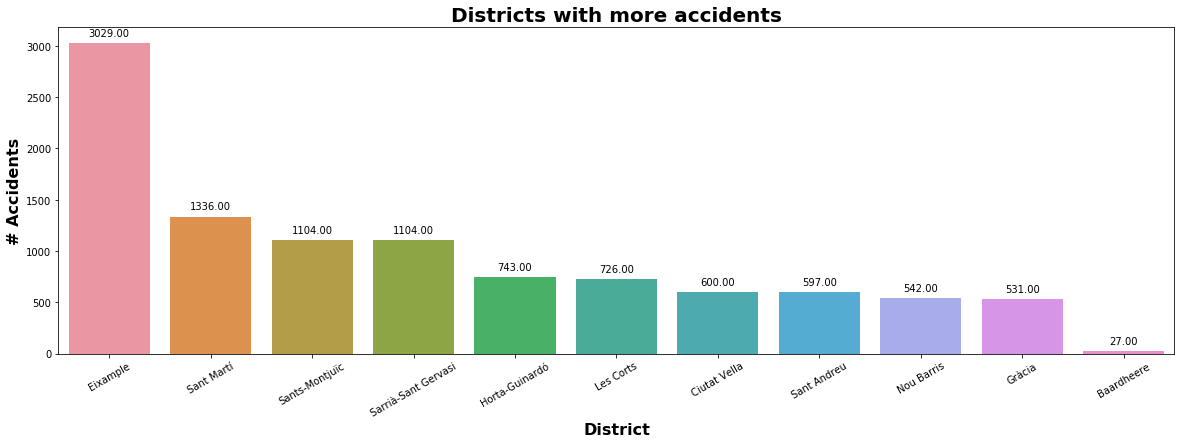

In [12]:
plt.figure(figsize=(20,6))
x = barcelona['District Name'].value_counts().index
y = barcelona['District Name'].value_counts()
ax = sns.barplot(x=x, y=y)
plt.title("Districts with more accidents", fontsize=20).set_weight('bold')
#value_barplot_label(ax)
plt.ylabel('# Accidents', fontsize=16).set_weight('bold')
plt.xlabel('District', fontsize=16).set_weight('bold')
plt.xticks(rotation=30)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 10), textcoords = 'offset points')
#tick_format(ax,1)

In [13]:
#We can see that Eiample has more no of accidents and Baardheere has less Accidents 

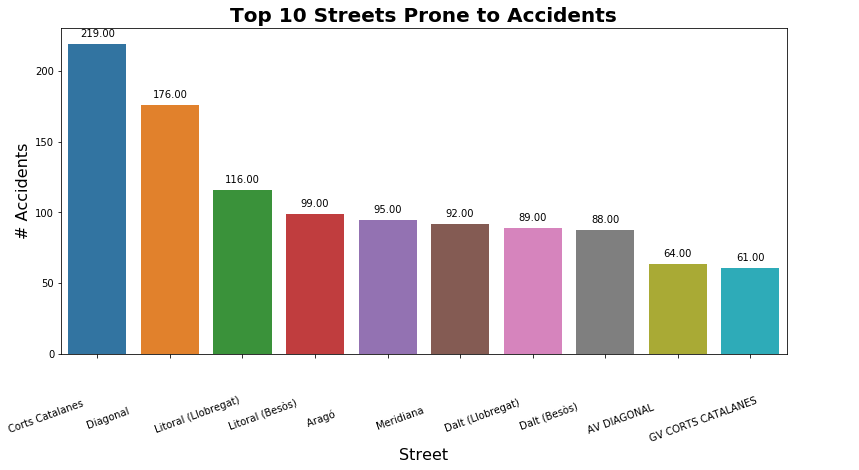

In [14]:
plt.figure(figsize=(13,6))
x = barcelona['Street'].value_counts().index[:10]
y = barcelona['Street'].value_counts()[:10]
splot = sns.barplot(x=x, y=y)
plt.title("Top 10 Streets Prone to Accidents", fontsize=20).set_weight('bold')
#value_barplot_label(ax)
plt.ylabel('# Accidents', fontsize=16)
plt.xlabel('Street', fontsize=16)
plt.xticks(rotation=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 10), textcoords = 'offset points')
#tick_format(ax,1)

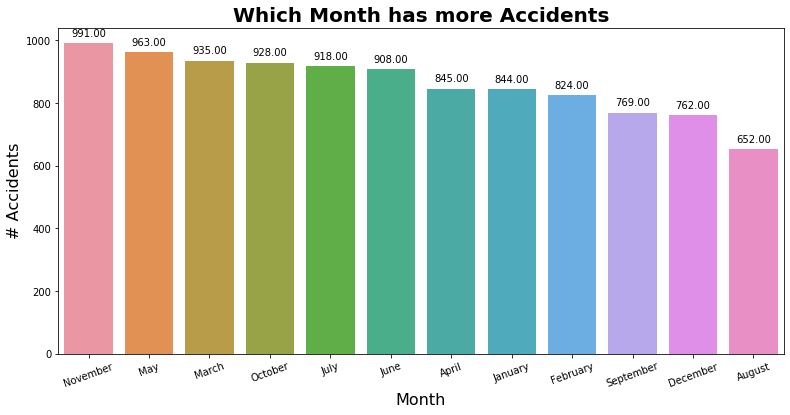

In [15]:
#Which month is having more no of accidents 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

plt.figure(figsize=(13,6))
x = barcelona['Month'].value_counts().index
y = barcelona['Month'].value_counts()
splot = sns.barplot(x=x, y=y)
plt.title("Which Month has more Accidents", fontsize=20).set_weight('bold')
#value_barplot_label(ax)
plt.ylabel('# Accidents', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 10), textcoords = 'offset points')
#tick_format(ax,1)



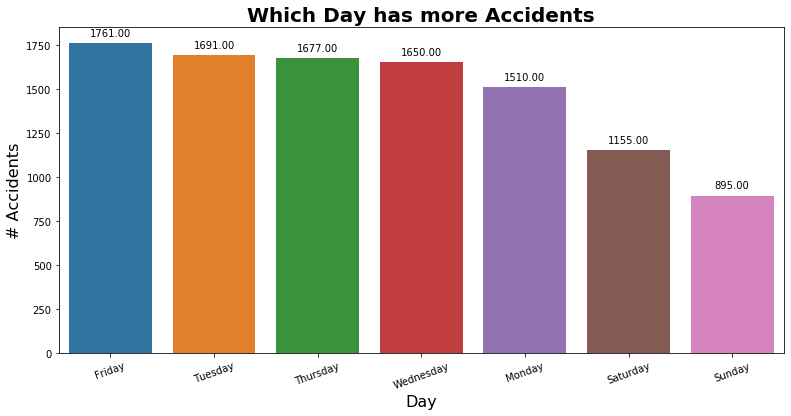

In [16]:
#Which day is having more no of accidents 


plt.figure(figsize=(13,6))
x = barcelona['Weekday'].value_counts().index
y = barcelona['Weekday'].value_counts()
splot = sns.barplot(x=x, y=y)
plt.title("Which Day has more Accidents", fontsize=20).set_weight('bold')
#value_barplot_label(ax)
plt.ylabel('# Accidents', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.xticks(rotation=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 10), textcoords = 'offset points')
#tick_format(ax,1)

In [17]:
#Weekday and Hour of day

cross_tab = pd.crosstab(barcelona['Weekday'], barcelona['Part of the day']).apply(lambda x: x/x.sum() * 100, axis = 1).round(2)



In [18]:
sorter = ['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']
sorterIndex = dict(zip(sorter, range(len(sorter))))

cross_tab['id'] = cross_tab.index
cross_tab['id'] = cross_tab['id'].map(sorterIndex)
cross_tab.sort_values('id',inplace=True)
cross_tab.head()


Part of the day,afternoon,evening,morning,night,id
Weekday,,,,,
Sunday,34.19,28.04,22.01,15.75,0
Monday,39.21,25.36,30.00,5.43,1
Tuesday,39.50,24.96,30.69,4.85,2
Wednesday,38.36,27.33,29.76,4.55,3
Thursday,39.00,27.31,28.26,5.43,4


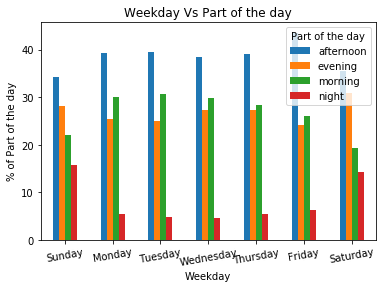

<Figure size 1440x720 with 0 Axes>

In [19]:
acc=cross_tab.drop(['id'],axis=1)
acc.plot.bar()

plt.xlabel('{}'.format('Weekday'))
plt.ylabel('% of {}'.format('Part of the day'))
plt.title('{} Vs {}'.format('Weekday','Part of the day'))
plt.xticks(rotation=10)
plt.figure(figsize=(20,10))
plt.show()



In [20]:
#There are more no of accidents in Afternoon especially Friday Afternoon
#Less no of accidents in the night compared to evening and afternoon
#Saturday and Sunday morning have less no of accidents  compared to weekdays, this might be because of holidays 
#Saturday and Sunday evenings, nights have more no of accidents  compared to weekdays, this might be because of weekend journeys 


In [21]:
#Grouping by Mild Injuries and Serious Injuries
import numpy as np
import pandas as pd
injuries = barcelona.groupby('Weekday')['Mild injuries','Serious injuries'].sum()
#s=barcelona.groupby('Weekday')['Serious injuries'].mean()

print(injuries.reset_index())

     Weekday  Mild injuries  Serious injuries
0     Friday           1984                44
1     Monday           1725                27
2   Saturday           1414                33
3     Sunday           1047                39
4   Thursday           1946                33
5    Tuesday           1946                34
6  Wednesday           1871                31


In [22]:
#Converting Injuries to Dataframe
injuries_df = pd.DataFrame(injuries)
injuries_df.head()

,Mild injuries,Serious injuries
Weekday,,
Friday,1984,44
Monday,1725,27
Saturday,1414,33
Sunday,1047,39
Thursday,1946,33


In [23]:
#Sorting Day in Order
sorter = ['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']
sorterIndex = dict(zip(sorter, range(len(sorter))))
print(sorterIndex)

{'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}


In [24]:
# Map the day_of_week to the required sort index
injuries_df['Day_id'] = injuries_df.index
injuries_df['Day_id'] = injuries_df['Day_id'].map(sorterIndex)
injuries_df.head()

,Mild injuries,Serious injuries,Day_id
Weekday,,,
Friday,1984,44,5
Monday,1725,27,1
Saturday,1414,33,6
Sunday,1047,39,0
Thursday,1946,33,4


In [25]:
injuries_df.sort_values('Day_id',inplace=True)
injuries_df.head()

,Mild injuries,Serious injuries,Day_id
Weekday,,,
Sunday,1047,39,0
Monday,1725,27,1
Tuesday,1946,34,2
Wednesday,1871,31,3
Thursday,1946,33,4


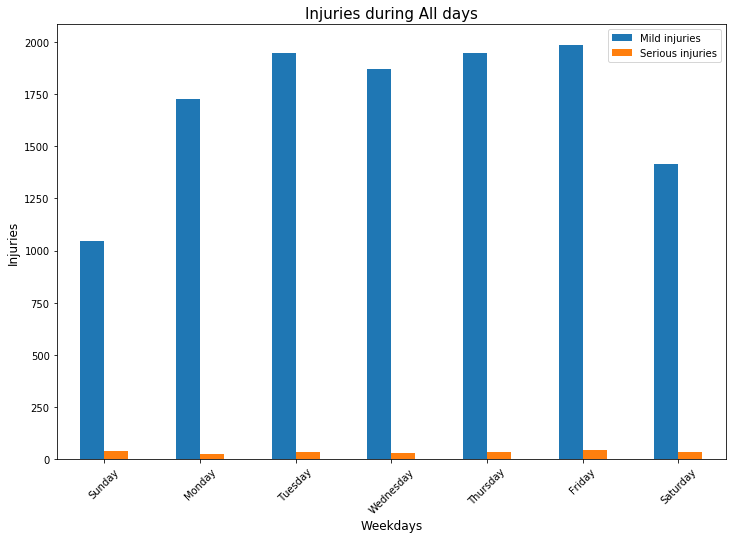

In [26]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

injuries_df=injuries_df.reset_index()
injuries_df.plot(y=['Mild injuries', 'Serious injuries'], x='Weekday', kind='bar', figsize=(12,8))
plt.xlabel('Weekdays',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Injuries',fontsize=12)
plt.title("Injuries during All days",fontsize=15)
plt.show()

In [27]:
# Mild Injuries and Serious Injuries are not under one scale.Mild injuries are in 1000's
#and Serious injuries are below 100. Normalizing using Minmax Scaler to bring under one scale 

from sklearn.preprocessing import MinMaxScaler 
std=MinMaxScaler()
cols=['Mild injuries','Serious injuries']
injuries_df[cols]=std.fit_transform(injuries_df[cols].values)

injuries_df.head()

,Weekday,Mild injuries,Serious injuries,Day_id
0,Sunday,0.000000,0.705882,0
1,Monday,0.723586,0.000000,1
2,Tuesday,0.959445,0.411765,2
3,Wednesday,0.879402,0.235294,3
4,Thursday,0.959445,0.352941,4


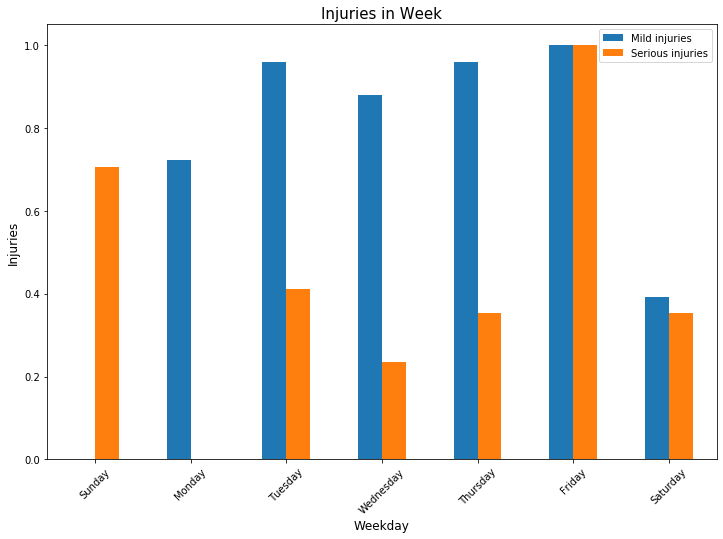

In [28]:
injuries_df.plot(y=['Mild injuries','Serious injuries'],x='Weekday',kind='bar',figsize=(12,8))
plt.xlabel('Weekday',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Injuries',fontsize=12)
plt.title("Injuries in Week",fontsize=15)
plt.show()

In [29]:
barcelona.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Baardheere,Unknown,Número 27 ...,Friday,October,13,8,morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Baardheere,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,afternoon,2,0,2,2,2.120452,41.339426
2,2017S010210,Baardheere,Unknown,Litoral (Besòs) ...,Friday,December,8,21,evening,5,0,5,2,2.167356,41.360885
3,2017S006364,Baardheere,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,afternoon,1,0,1,3,2.185272,41.416365


In [30]:
#Part of day vs Injuries
timeofday = barcelona.groupby('Part of the day')['Mild injuries','Serious injuries'].sum()
print(timeofday.reset_index())

  Part of the day  Mild injuries  Serious injuries
0       afternoon           4722                68
1         evening           3242                83
2         morning           3151                63
3           night            818                27


In [31]:
timeofday_df = pd.DataFrame(timeofday)
sort = ['morning','afternoon','evening','night']
sortIndex = dict(zip(sort, range(len(sort))))
print(sortIndex)

{'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}


In [32]:
timeofday_df['Time_id'] = timeofday_df.index
timeofday_df['Time_id'] = timeofday_df['Time_id'].map(sortIndex)
timeofday_df.head()

,Mild injuries,Serious injuries,Time_id
Part of the day,,,
afternoon,4722,68,1
evening,3242,83,2
morning,3151,63,0
night,818,27,3


In [33]:
timeofday_df.sort_values('Time_id',inplace=True)
timeofday_df.head()

,Mild injuries,Serious injuries,Time_id
Part of the day,,,
morning,3151,63,0
afternoon,4722,68,1
evening,3242,83,2
night,818,27,3


In [34]:
timeofday_df = timeofday_df.reset_index()
timeofday_df.head()

,Part of the day,Mild injuries,Serious injuries,Time_id
0,morning,3151,63,0
1,afternoon,4722,68,1
2,evening,3242,83,2
3,night,818,27,3


In [35]:
from sklearn.preprocessing import MinMaxScaler 
std1=MinMaxScaler()
cols1=['Mild injuries','Serious injuries']
timeofday_df[cols]=std1.fit_transform(timeofday_df[cols].values)

timeofday_df.head()

,Part of the day,Mild injuries,Serious injuries,Time_id
0,morning,0.597592,0.642857,0
1,afternoon,1.000000,0.732143,1
2,evening,0.620902,1.000000,2
3,night,0.000000,0.000000,3


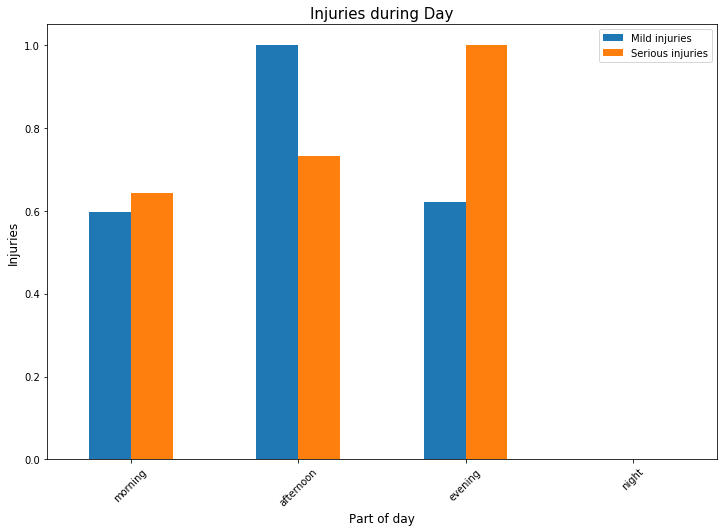

In [36]:
timeofday_df.plot(y=['Mild injuries','Serious injuries'],x='Part of the day',kind='bar',figsize=(12,8))
plt.xlabel('Part of day',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Injuries',fontsize=12)
plt.title("Injuries during Day",fontsize=15)
plt.show()

In [37]:
victims = barcelona.groupby('Weekday')['Mild injuries','Serious injuries'].sum()

In [38]:
#Test of Independence
barcelona.head()


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Baardheere,Unknown,Número 27 ...,Friday,October,13,8,morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Baardheere,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,afternoon,2,0,2,2,2.120452,41.339426
2,2017S010210,Baardheere,Unknown,Litoral (Besòs) ...,Friday,December,8,21,evening,5,0,5,2,2.167356,41.360885
3,2017S006364,Baardheere,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,afternoon,1,0,1,3,2.185272,41.416365


In [39]:
barcelona['Street'].value_counts()

Corts Catalanes                                       219
Diagonal                                              176
Litoral (Llobregat)                                   116
Litoral (Besòs)                                        99
Aragó                                                  95
                                                     ... 
NICARAGUA / Berlín                                      1
Sarrià / Londres                                        1
Aymà / Perelló                                          1
AVINYÓ                                                  1
Consell de Cent / Calàbria                              1
Name: Street, Length: 4253, dtype: int64

In [40]:
barcelona['District Name'].value_counts()

Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Baardheere               27
Name: District Name, dtype: int64

In [41]:
catnames=['District Name','Weekday','Month','Part of the day','Mild injuries','Serious injuries','Victims','Vehicles involved']
from scipy.stats import chi2_contingency

In [42]:
factors_paired=[(i,j) for i in catnames for j in catnames]
chi2, p_values = [],[]
for f in factors_paired:
    if f[0]!=f[1]:
        chitest=chi2_contingency(pd.crosstab(barcelona[f[0]],barcelona[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)


p1=np.array(p_values).reshape((8,8))
#p1=np.array(p_values)
p1=pd.DataFrame(p1.round(2), index=catnames, columns=catnames)
p1


,District Name,Weekday,Month,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved
District Name,0.00,0.07,0.00,0.00,0.0,0.19,0.0,0.0
Weekday,0.07,0.00,0.00,0.00,0.0,0.03,0.0,0.0
Month,0.00,0.00,0.00,0.20,0.0,0.13,0.0,0.4
Part of the day,0.00,0.00,0.20,0.00,0.0,0.01,0.0,0.0
Mild injuries,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0
Serious injuries,0.19,0.03,0.13,0.01,0.0,0.00,0.0,0.0
Victims,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0
Vehicles involved,0.00,0.00,0.40,0.00,0.0,0.00,0.0,0.0


In [43]:
# Null Hypothesis: Independant:(p value>0.05) # Accept Null Hypothesis 

# Alternate Hypothesis: Dependant:(p is <0.05) # Accept Alternate Hypothesis

In [44]:
p1.columns

Index(['District Name', 'Weekday', 'Month', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved'],
      dtype='object')

In [45]:
p1.index

Index(['District Name', 'Weekday', 'Month', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved'],
      dtype='object')

In [46]:
p2= p1[p1<0.05]
p2

,District Name,Weekday,Month,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved
District Name,0.0,NaN,0.0,0.00,0.0,NaN,0.0,0.0
Weekday,NaN,0.00,0.0,0.00,0.0,0.03,0.0,0.0
Month,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN
Part of the day,0.0,0.00,NaN,0.00,0.0,0.01,0.0,0.0
Mild injuries,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Serious injuries,NaN,0.03,NaN,0.01,0.0,0.00,0.0,0.0
Victims,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Vehicles involved,0.0,0.00,NaN,0.00,0.0,0.00,0.0,0.0


In [47]:
#Nan=Independant
#Dependant
for i in p2.index:
    for j in p2.columns:
        if ~np.isnan(p2.loc[i,j]) and i!=j:
            print((i,j))

('District Name', 'Month')
('District Name', 'Part of the day')
('District Name', 'Mild injuries')
('District Name', 'Victims')
('District Name', 'Vehicles involved')
('Weekday', 'Month')
('Weekday', 'Part of the day')
('Weekday', 'Mild injuries')
('Weekday', 'Serious injuries')
('Weekday', 'Victims')
('Weekday', 'Vehicles involved')
('Month', 'District Name')
('Month', 'Weekday')
('Month', 'Mild injuries')
('Month', 'Victims')
('Part of the day', 'District Name')
('Part of the day', 'Weekday')
('Part of the day', 'Mild injuries')
('Part of the day', 'Serious injuries')
('Part of the day', 'Victims')
('Part of the day', 'Vehicles involved')
('Mild injuries', 'District Name')
('Mild injuries', 'Weekday')
('Mild injuries', 'Month')
('Mild injuries', 'Part of the day')
('Mild injuries', 'Serious injuries')
('Mild injuries', 'Victims')
('Mild injuries', 'Vehicles involved')
('Serious injuries', 'Weekday')
('Serious injuries', 'Part of the day')
('Serious injuries', 'Mild injuries')
('Serio

In [48]:
barcelona.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Baardheere,Unknown,Número 27 ...,Friday,October,13,8,morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Baardheere,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,afternoon,2,0,2,2,2.120452,41.339426
2,2017S010210,Baardheere,Unknown,Litoral (Besòs) ...,Friday,December,8,21,evening,5,0,5,2,2.167356,41.360885
3,2017S006364,Baardheere,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,afternoon,1,0,1,3,2.185272,41.416365


In [49]:
#Model Building
#Removing features not required for Model Building
Model4 = barcelona.drop(['Id','Neighborhood Name','Hour','Longitude','Latitude','Street','Victims',
                         'Vehicles involved','Day'],axis=1)

Model4.head()

,District Name,Weekday,Month,Part of the day,Mild injuries,Serious injuries
0,Baardheere,Friday,October,morning,2,0
1,Baardheere,Friday,September,afternoon,2,0
2,Baardheere,Friday,December,evening,5,0
3,Baardheere,Friday,July,night,1,0
4,Sant Martí,Thursday,May,afternoon,1,0


In [50]:
Model4['Mild injuries'].value_counts()

1     7253
2     1579
0     1082
3      273
4       99
5       31
6       11
7        7
10       2
9        1
8        1
Name: Mild injuries, dtype: int64

In [51]:
Model4['Serious injuries'].value_counts()

0    10116
1      207
2       15
4        1
Name: Serious injuries, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Model4.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 6 columns):
District Name       10339 non-null object
Weekday             10339 non-null object
Month               10339 non-null object
Part of the day     10339 non-null object
Mild injuries       10339 non-null int64
Serious injuries    10339 non-null int64
dtypes: int64(2), object(4)
memory usage: 484.8+ KB


In [53]:
#Transforming Categorical to Numeric
for col in Model4.select_dtypes('object'):
    Model4[col] = le.fit_transform(Model4[col] )
Model4.head()

,District Name,Weekday,Month,Part of the day,Mild injuries,Serious injuries
0,0,0,10,2,2,0
1,0,0,11,0,2,0
2,0,0,2,1,5,0
3,0,0,5,3,1,0
4,8,4,8,0,1,0


In [54]:
Model4['Part of the day'].value_counts()

0    4030
2    2816
1    2748
3     745
Name: Part of the day, dtype: int64

In [55]:
x=Model4.drop(['Mild injuries','Serious injuries'],axis=1)
#Y1=Model4['Mild injuries']
Y2=Model4['Serious injuries']

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split


#x_train,x_test,Y1_train,Y1_test=train_test_split(x,Y1,train_size=0.7,test_size=0.3,random_state=123)
x_train,x_test,Y2_train,Y2_test=train_test_split(x,Y2,train_size=0.7,test_size=0.3,random_state=123)



In [57]:
x_train.head()

,District Name,Weekday,Month,Part of the day
450,2,3,11,3
5295,1,0,8,0
2448,7,0,9,0
4026,1,6,7,1
4076,2,4,0,2


In [58]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(x_train,Y1_train)
logreg.fit(x_train,Y2_train)

#Y1_pred=logreg.predict(x_test)
Y2_pred=logreg.predict(x_test)


c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [59]:
acc_log = round(logreg.score(x_train, Y2_train)*100, 2)
print(round(acc_log,2,),"%")

97.68 %


In [60]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y2_pred, Y2_test)
acc

0.9822695035460993

In [61]:
Y2_pred[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
Y2_test[0:50]

1301    0
9945    0
3104    0
8674    0
2832    0
6696    0
943     0
6717    0
5649    0
8770    0
8610    0
2479    0
2197    0
774     0
9497    0
2896    0
1843    0
1796    0
2932    0
7219    0
5063    0
5975    0
4427    0
3759    0
7792    0
5710    0
5980    0
9458    0
6725    0
9636    0
3725    0
4192    0
7029    0
4643    0
3901    0
3898    0
8966    0
2740    0
1335    0
5209    0
3483    0
5735    0
3845    0
1949    0
9356    0
1621    0
9827    0
6860    0
3975    0
8161    0
Name: Serious injuries, dtype: int64

In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
cnf_matrix = confusion_matrix(Y2_test, Y2_pred)
cnf_matrix


array([[3047,    0,    0],
       [  52,    0,    0],
       [   3,    0,    0]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(Y2_test, Y2_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3047
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00         3

    accuracy                           0.98      3102
   macro avg       0.33      0.33      0.33      3102
weighted avg       0.96      0.98      0.97      3102



c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 257.44, 'Predicted label')

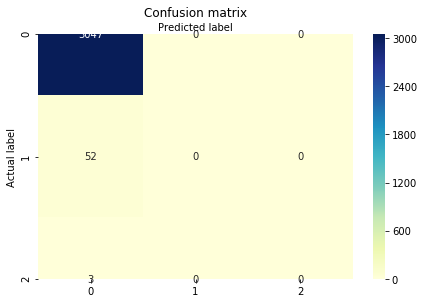

In [66]:
%matplotlib inline
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred))
print("Precision:",metrics.precision_score(Y2_test, Y2_pred,pos_label='positive',average='micro'))
print("Recall:",metrics.recall_score(Y2_test, Y2_pred,pos_label='positive',average='micro'))

Accuracy: 0.9822695035460993
Precision: 0.9822695035460993
Recall: 0.9822695035460993


c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
